<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#unfreeze,-with-pooler,-limit-30000" data-toc-modified-id="unfreeze,-with-pooler,-limit-30000-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>unfreeze, with pooler, limit 30000</a></span></li><li><span><a href="#unfreeze,-without-pooler,-limit-30000" data-toc-modified-id="unfreeze,-without-pooler,-limit-30000-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>unfreeze, without pooler, limit 30000</a></span></li><li><span><a href="#freeze-6,-without-pooler,-limit-30000" data-toc-modified-id="freeze-6,-without-pooler,-limit-30000-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>freeze 6, without pooler, limit 30000</a></span></li></ul></div>

In [ ]:
%run ./multitask_style_learning_utils.ipynb

# unfreeze, with pooler, limit 30000

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/9380 [00:00<?, ?it/s]

  0%|          | 0/1876 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1876 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1876 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1876 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1876 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

,i_epoch,train_loss,train_loss_SARC,train_loss_ShortHumor,train_acc,train_acc_SARC,train_acc_ShortHumor,val_loss,val_loss_SARC,val_loss_ShortHumor,val_acc,val_acc_SARC,val_acc_ShortHumor
0,0.0,0.585565,0.537931,0.047634,0.863050,0.740000,0.986100,0.749543,0.606571,0.142972,0.681362,0.663733,0.948058
1,1.0,0.495469,0.482098,0.013371,0.892100,0.788033,0.996167,1.028772,0.851719,0.177053,0.652253,0.632433,0.952093
2,2.0,0.218864,0.214230,0.004634,0.957150,0.915867,0.998433,1.142322,0.965179,0.177143,0.671200,0.652167,0.959153
3,3.0,0.074475,0.073378,0.001097,0.988100,0.976500,0.999700,1.316744,1.108894,0.207850,0.687959,0.669867,0.961674
4,4.0,0.028884,0.028439,0.000444,0.995783,0.991633,0.999933,1.455237,1.253992,0.201244,0.696432,0.679133,0.958144


Iteration:   0%|          | 0/1000 [00:00<?, ?it/s]

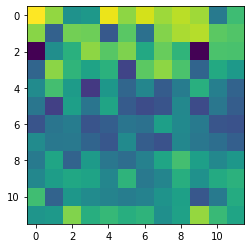

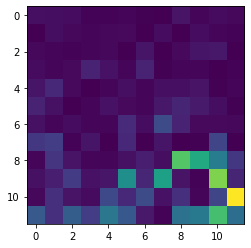

In [ ]:
selected_tasks = [
#                   'PASTEL_country', # 33224
                  'SARC', # 205645
#                   'SarcasmGhosh', # 39780
                  'ShortHumor', # 37801
#                   'ShortJokeKaggle', # 406682
#                   'ShortRomance', # 1902
#                   'TroFi', # 3335
#                   'VUA', # 15157
                 ] 
training_args = TrainingArgs(selected_tasks=selected_tasks,
                             base_model_name='bert-base-uncased',
                             freeze_bert=False,
                             use_pooler=True,
                             num_epoch=5,
                             data_limit=30000,
                            )

model = init_model(training_args)
freeze_model(model, training_args.freeze_bert)
df_evaluation, df_loss_per_step, model = train_model(model, training_args)

eval_dataloader = MultiTaskTestDataLoader(training_args, split='dev')
attn_entropy, head_importance, preds, labels = compute_heads_importance(model, eval_dataloader, training_args)

imshow(attn_entropy)
imshow(head_importance)


# unfreeze, without pooler, limit 30000

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/9380 [00:00<?, ?it/s]

  0%|          | 0/1876 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1876 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1876 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1876 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1876 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

,i_epoch,train_loss,train_loss_SARC,train_loss_ShortHumor,train_acc,train_acc_SARC,train_acc_ShortHumor,val_loss,val_loss_SARC,val_loss_ShortHumor,val_acc,val_acc_SARC,val_acc_ShortHumor
0,0.0,0.521765,0.474408,0.047356,0.885267,0.782733,0.987800,0.716502,0.581705,0.134797,0.709815,0.694200,0.946041
1,1.0,0.284448,0.275808,0.008640,0.946917,0.896300,0.997533,0.793078,0.654193,0.138885,0.700935,0.683933,0.958144
2,2.0,0.185385,0.178247,0.007138,0.963133,0.928367,0.997900,1.368234,1.146125,0.222109,0.666323,0.647667,0.948563
3,3.0,0.058270,0.057153,0.001117,0.989967,0.980133,0.999800,1.521820,1.329631,0.192189,0.678485,0.660167,0.955623
4,4.0,0.017020,0.016548,0.000472,0.997567,0.995167,0.999967,1.520382,1.330641,0.189741,0.701216,0.684100,0.960161


Iteration:   0%|          | 0/1000 [00:00<?, ?it/s]

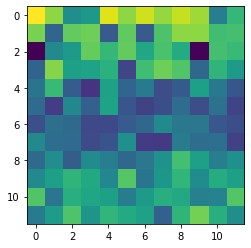

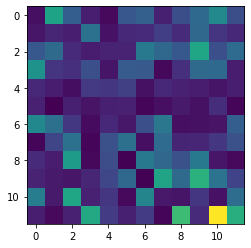

In [ ]:
selected_tasks = [
#                   'PASTEL_country', # 33224
                  'SARC', # 205645
#                   'SarcasmGhosh', # 39780
                  'ShortHumor', # 37801
#                   'ShortJokeKaggle', # 406682
#                   'ShortRomance', # 1902
#                   'TroFi', # 3335
#                   'VUA', # 15157
                 ] 
training_args = TrainingArgs(selected_tasks=selected_tasks,
                             base_model_name='bert-base-uncased',
                             freeze_bert=False,
                             use_pooler=False,
                             num_epoch=5,
                             data_limit=30000,
                            )

model = init_model(training_args)
freeze_model(model, training_args.freeze_bert)
df_evaluation, df_loss_per_step, model = train_model(model, training_args)

eval_dataloader = MultiTaskTestDataLoader(training_args, split='dev')
attn_entropy, head_importance, preds, labels = compute_heads_importance(model, eval_dataloader, training_args)

imshow(attn_entropy)
imshow(head_importance)


# freeze 6, without pooler, limit 30000

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/9380 [00:00<?, ?it/s]

  0%|          | 0/1876 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1876 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1876 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1876 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1876 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

,i_epoch,train_loss,train_loss_SARC,train_loss_ShortHumor,train_acc,train_acc_SARC,train_acc_ShortHumor,val_loss,val_loss_SARC,val_loss_ShortHumor,val_acc,val_acc_SARC,val_acc_ShortHumor
0,0.0,0.562430,0.506279,0.056151,0.875867,0.767100,0.984633,0.727885,0.586557,0.141329,0.699841,0.683667,0.944529
1,1.0,0.360403,0.346138,0.014265,0.923267,0.851233,0.995300,0.836634,0.637814,0.198820,0.705218,0.689300,0.946041
2,2.0,0.195055,0.191138,0.003918,0.963600,0.928267,0.998933,1.003808,0.812032,0.191776,0.687459,0.670033,0.951084
3,3.0,0.078533,0.077616,0.000916,0.987450,0.975000,0.999900,1.169520,0.986937,0.182582,0.695182,0.677733,0.959153
4,4.0,0.036286,0.035676,0.000610,0.994983,0.990000,0.999967,1.343575,1.151132,0.192443,0.701216,0.684400,0.955623


Iteration:   0%|          | 0/1000 [00:00<?, ?it/s]

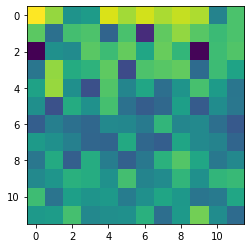

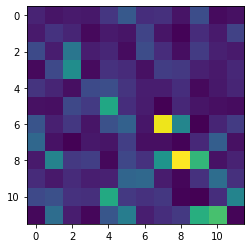

In [ ]:
selected_tasks = [
#                   'PASTEL_country', # 33224
                  'SARC', # 205645
#                   'SarcasmGhosh', # 39780
                  'ShortHumor', # 37801
#                   'ShortJokeKaggle', # 406682
#                   'ShortRomance', # 1902
#                   'TroFi', # 3335
#                   'VUA', # 15157
                 ] 
training_args = TrainingArgs(selected_tasks=selected_tasks,
                             base_model_name='bert-base-uncased',
                             freeze_bert=6,
                             use_pooler=False,
                             num_epoch=5,
                             data_limit=30000,
                            )

model = init_model(training_args)
freeze_model(model, training_args.freeze_bert)
df_evaluation, df_loss_per_step, model = train_model(model, training_args)

eval_dataloader = MultiTaskTestDataLoader(training_args, split='dev')
attn_entropy, head_importance, preds, labels = compute_heads_importance(model, eval_dataloader, training_args)

imshow(attn_entropy)
imshow(head_importance)
